### Project: Motivate Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

In [1]:
library(ggplot2)
library(repr)
library(scales)

bikeshare = read.csv('bikeshare.csv')

# Read in concatenated file for Chicago, New York City and Washington DC
# Changed and unified column naming conventions
# Split Start Time and End Time into date and time columns
# Added Columns: City, Start.Date, Start.Time (hhmm), Weekday, End.Date, End.Time (hhmm), Trip.Duration (hh:mm:ss), Trip.In.Sec, Age

In [10]:
#Take a quick look at the columns and info

head(bikeshare, 3)

City,Start.Date,Start.Time,Weekday,End.Date,End.Time,Trip.Duration,Trip..In.Sec,Start.Station,End.Station,User.Type,Gender,Birth.Year,Age
Chicago,6/2/2017,759,Friday,6/2/2017,825,0:26:29,1589,2112 W Peterson Ave,2112 W Peterson Ave,Subscriber,Female,1963,54
Chicago,2/7/2017,452,Tuesday,2/7/2017,503,0:11:17,677,2112 W Peterson Ave,Broadway & Granville Ave,Subscriber,Male,1963,54
Chicago,1/11/2017,850,Wednesday,1/11/2017,857,0:06:50,410,2112 W Peterson Ave,Broadway & Thorndale Ave,Subscriber,Male,1974,43


### Question 1

Which rental days are the most popular in each city?

In [3]:
#Exploration, testing code
#Create table of weekdays and number of rentals

weekday.totals <- table(bikeshare$City, bikeshare$Weekday)
weekday.totals

               
                Friday Monday Saturday Sunday Thursday Tuesday Wednesday
  Chicago        43922  44881    40885  38775    43095   45912     42530
  New York City  44664  41923    33926  36151    47497   43752     52087
  Washington DC  43280  39930    40593  39576    43946   44519     48156

In [11]:
#Show rentals by weekday in decreasing order.
#First day listed will be the most popular/highest rental day
#Place code in function for easy retreval should stats be needed again later

pop.weekdays <- function() {
    city = c('Chicago', 'New York City', 'Washington DC')

    for (i in (1:3)){
        #create subset table; decreasing order; barchart
        city.wkdy <- table(subset(bikeshare, City == city[i], Weekday))
        city.wkdy <- city.wkdy[order(city.wkdy, decreasing = TRUE)]

        #print city weekday statistics
        cat(city[i],"'s most popular days for trips are: ",'(', "L-R, decreasing order", ')', sep = '')
        print(city.wkdy)
        cat('\n')

    }
}

pop.weekdays()

Chicago's most popular days for trips are: (L-R, decreasing order)
  Tuesday    Monday    Friday  Thursday Wednesday  Saturday    Sunday 
    45912     44881     43922     43095     42530     40885     38775 

New York City's most popular days for trips are: (L-R, decreasing order)
Wednesday  Thursday    Friday   Tuesday    Monday    Sunday  Saturday 
    52087     47497     44664     43752     41923     36151     33926 

Washington DC's most popular days for trips are: (L-R, decreasing order)
Wednesday   Tuesday  Thursday    Friday  Saturday    Monday    Sunday 
    48156     44519     43946     43280     40593     39930     39576 



Resources: [Help with axis labels](https://www.tutorialspoint.com/how-to-show-all-x-axis-labels-in-a-bar-graph-created-by-using-barplot-function-in-r#:~:text=In%20base%20R%2C%20the%20barplot,to%20use%20las%20and%20cex)

### Q1 Summary:

I thought bike usage would be heavier during the weekends, but it turns out that weekdays are busier. It was also interesting to see that busiest/most popular days were Wednesday and Tuesday.

<b>Chicago:</b> Tuesday, 45912  
<b>New York City:</b> Wednesday, 52087  
<b>Washington DC:</b> Wednesday,  48156  

I'm left asking why these days? What makes them more popular? Why isn't Monday, the start of the work week, included? Could it be because more subscribers (regulars/locals) call in sick Monday after a busy weekend? What is the breakdown of customers and subscribers on these days? My curiosity has been piqued and further exploration could be conducted to get a more complete story.

### Question 2:

What are the top 5 Start Stations for each city?

Chicago's top 5 start stations are: 

                 Start.Station Times.Used
1      Streeter Dr & Grand Ave       6911
2 Clinton St & Washington Blvd       4306
3    Lake Shore Dr & Monroe St       4289
4      Clinton St & Madison St       3744
5          Canal St & Adams St       3443



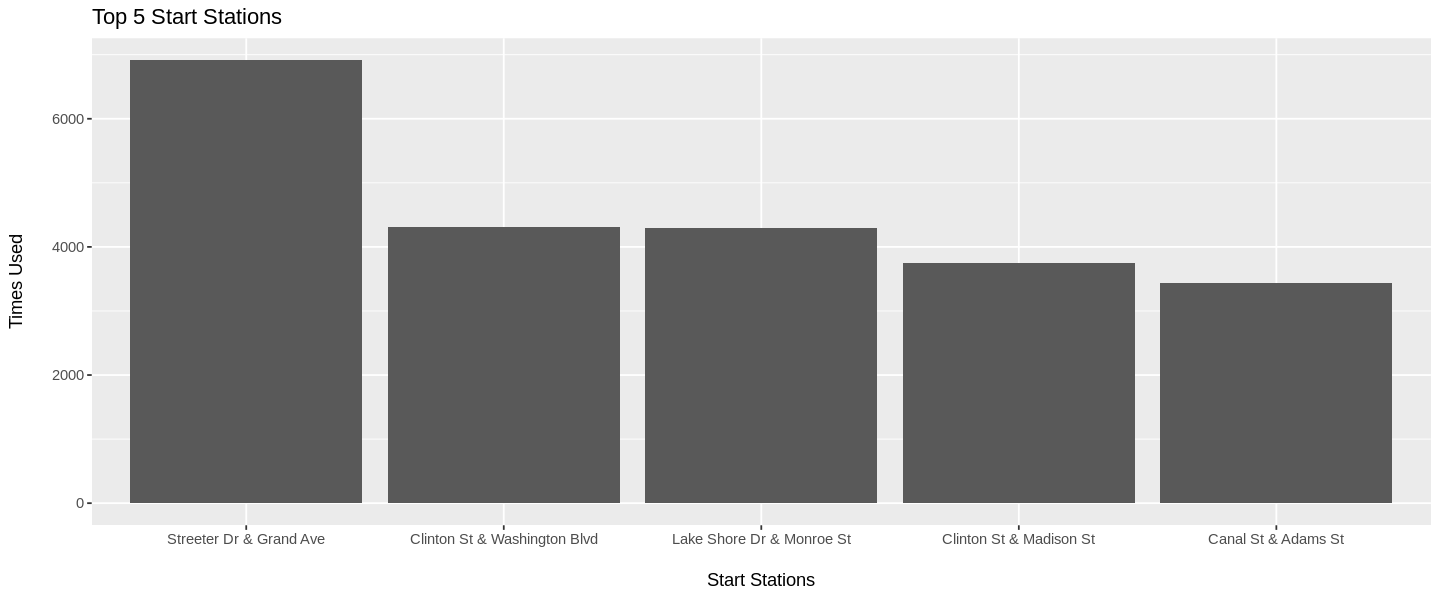

New York City's top 5 start stations are: 

          Start.Station Times.Used
1 Pershing Square North       3069
2    E 17 St & Broadway       2089
3    Broadway & E 22 St       2082
4       W 21 St & 6 Ave       2019
5 West St & Chambers St       1968



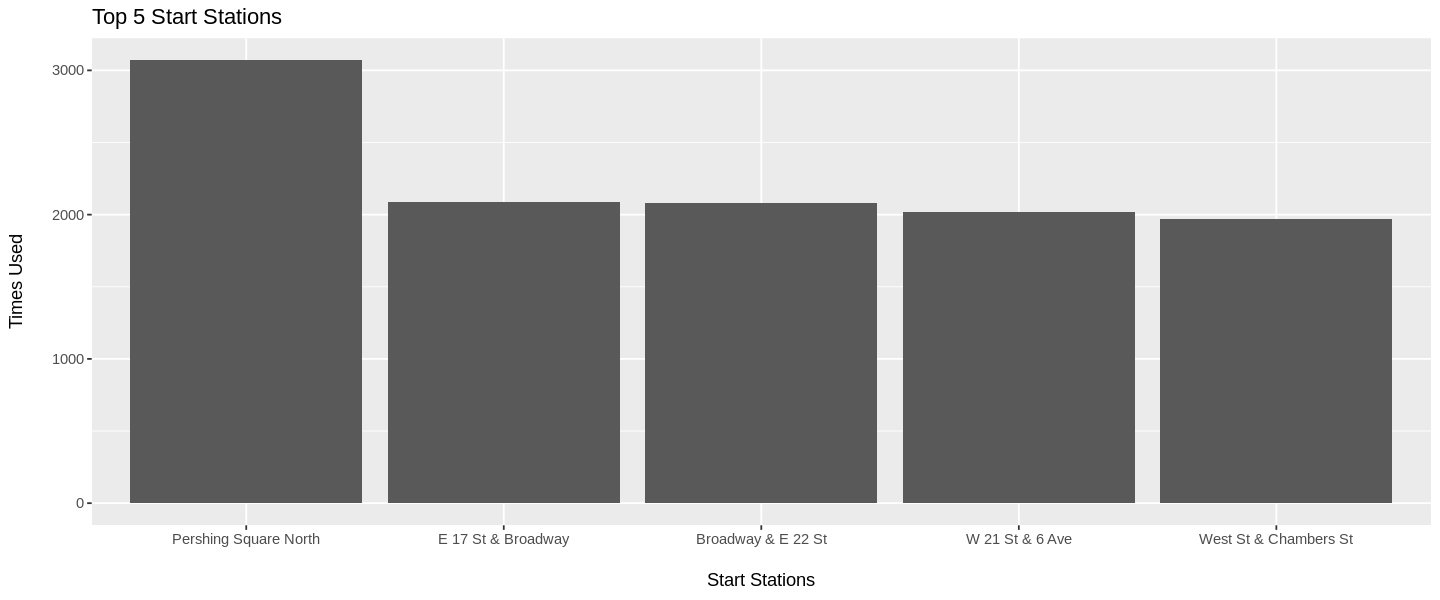

Washington DC's top 5 start stations are: 

                         Start.Station Times.Used
1      Columbus Circle / Union Station       5656
2                     Lincoln Memorial       5043
3            Jefferson Dr & 14th St SW       5022
4 Massachusetts Ave & Dupont Circle NW       3946
5                       15th & P St NW       3519



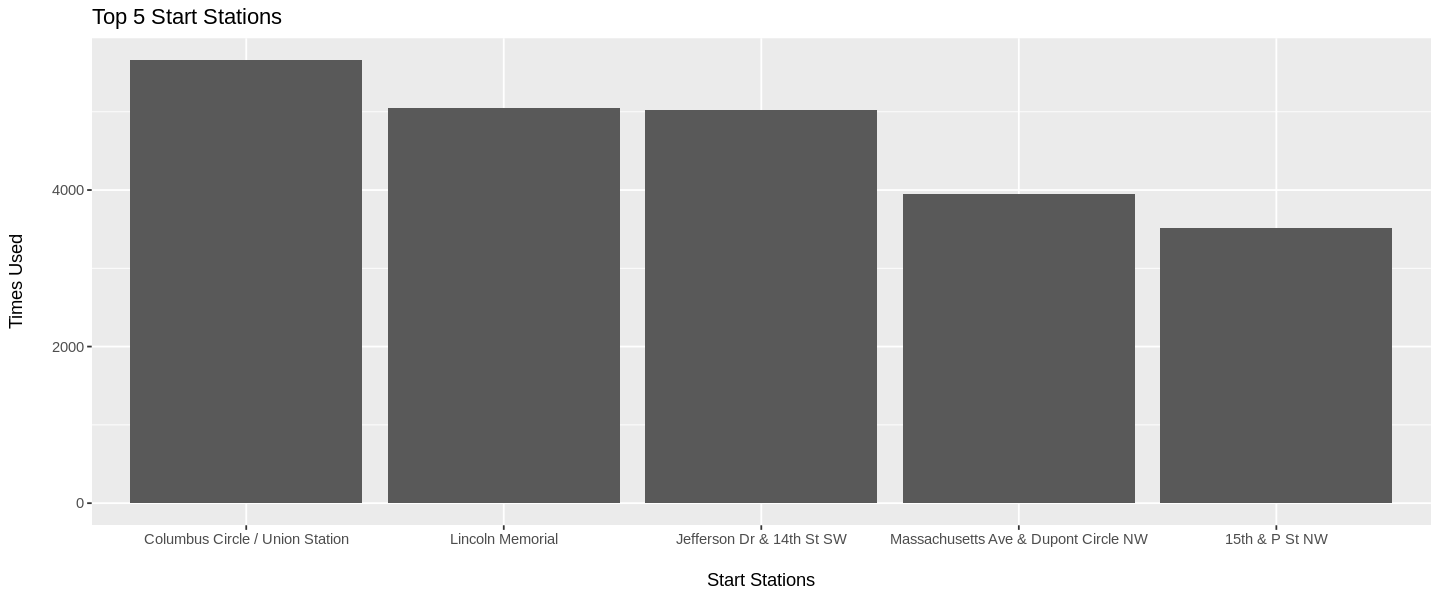

In [5]:
#Show top 5 popular start stations in decreasing order.
#First station listed will be the most popular/highest frequency
#Create graph/chart for that city's top 5 start stations
#Use For Loop

city = c('Chicago', 'New York City', 'Washington DC')

for (i in (1:3)){
    #create subset table; decreasing order; put into df; change col names
    city.pop.start <- table(subset(bikeshare, City == city[i], Start.Station))
    city.pop.start <- city.pop.start[order(city.pop.start, decreasing = TRUE)]
    city.pop5.start = as.data.frame(city.pop.start[1:5])
    colnames(city.pop5.start)[1] = 'Start.Station'
    colnames(city.pop5.start)[2] = 'Times.Used'
    
    #create ggplt bar chart
    options(repr.plot.width=12, repr.plot.height=5)
    print(ggplot(data= city.pop5.start, aes(x = city.pop5.start$Start.Station, y = city.pop5.start$Times.Used)) + 
    geom_col() +
    labs(x = '\nStart Stations', y = 'Times Used\n', title = 'Top 5 Start Stations' ))

    #print city top 5 station statistics
    cat(city[i],"'s top 5 start stations are: \n\n", sep = '')
    print(city.pop5.start)
    cat('\n')
    
}

Resources: [ggplot printing from a for loop](https://statisticsglobe.com/print-ggplot2-plot-within-for-loop-in-r)

### Q2 Summary:

<b>Chicago:</b> Streeter Dr & Grand Ave, 6911  
<b>New York City:</b> Pershing Square North, 3069  
<b>Washington DC:</b> Columbus Circle / Union Station, 5656  

One of the first things I noticed was that New York City's start stations had significationly lower numbers than Chicago and Washington DC. With all three cities having the same amount of entries, I thought the numbers would be more uniform since they're all major cities. 

I'm left asking why are the numbers so much smaller for New York City? Are there more stations so user numbers are more spread out? Were any of the stations more/less accessble? Where are the stations located? Are they geared more towards historical areas, commuter locations (subways)? Further exploration could be done to get a more robust story. 

### Question 3:

What are the user percentages for Customers and Subscirbers in each city?  
  
Note: 'Customers' are users who pay as they go/need. 'Subscribers' use pre-paid usage plans.

In [6]:
summary(bikeshare$User.Type)

Customer  Dependent Subscriber 
       692     170483          1     728824

In [7]:
#Exploration, tesing code
#Number of Customers

nrow(bikeshare[bikeshare$User.Type == 'Customer', ])

#Number of Customers per City
nrow(bikeshare[bikeshare$City == 'Chicago' & bikeshare$User.Type == 'Customer', ])
nrow(bikeshare[bikeshare$City == 'New York City' & bikeshare$User.Type == 'Customer', ])
nrow(bikeshare[bikeshare$City == 'Washington DC' & bikeshare$User.Type == 'Customer', ])


[1] 170483

[1] 61110

[1] 30159

[1] 79214

In [8]:
#Exploration, testing code
#Number of Subscribers

nrow(bikeshare[bikeshare$User.Type == 'Subscriber', ])

#Number of Subscribers per City
nrow(bikeshare[bikeshare$City == 'Chicago' & bikeshare$User.Type == 'Subscriber', ])
nrow(bikeshare[bikeshare$City == 'New York City' & bikeshare$User.Type == 'Subscriber', ])
nrow(bikeshare[bikeshare$City == 'Washington DC' & bikeshare$User.Type == 'Subscriber', ])

[1] 728824

[1] 238889

[1] 269149

[1] 220786

Chicago's user base is 80% Subscribers and 20% Customers.


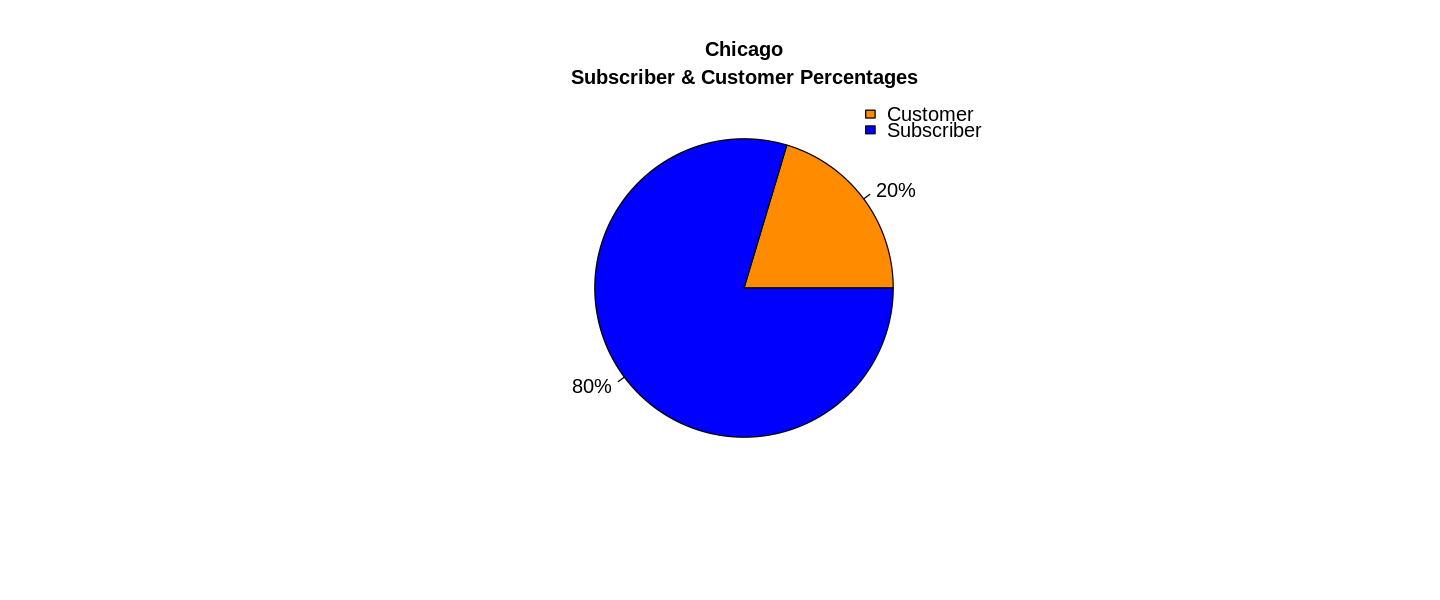

New York City's user base is 90% Subscribers and 10% Customers.


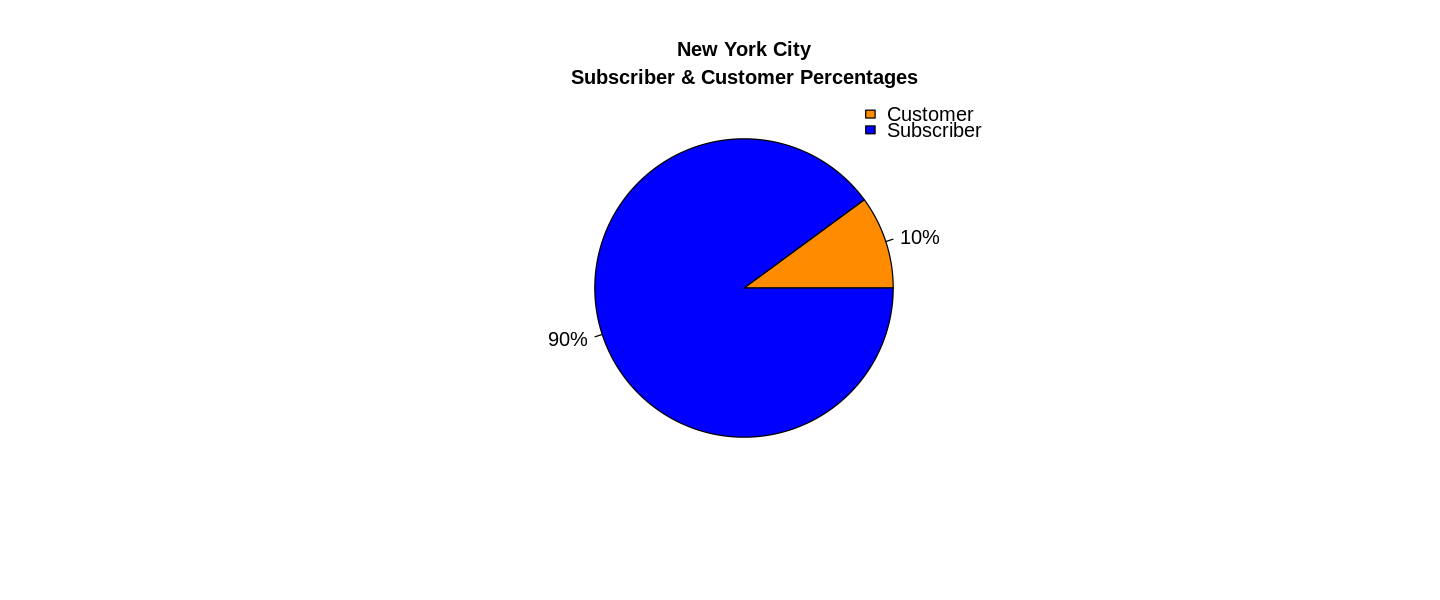

Washington DC's user base is 74% Subscribers and 26% Customers.


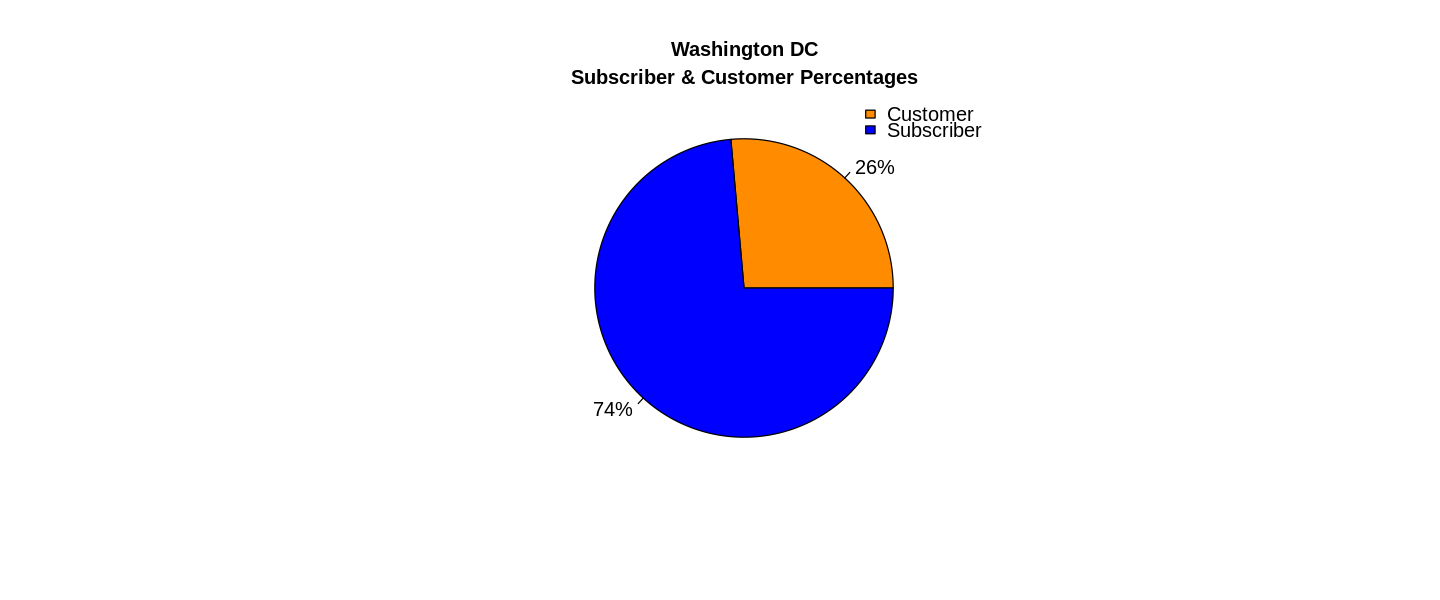

In [9]:
#Number of Customers and Subscribers by city
#Get percentages for customer & subscriber by city
#Create graph/chart for that city's percentages.
#Use For Loop

city = c('Chicago', 'New York City', 'Washington DC')

for (i in (1:3)){
    #get number of customers and subscribers by city
    customer.num <- nrow(bikeshare[bikeshare$City == city[i] & bikeshare$User.Type == 'Customer', ])
    subscriber.num <- nrow(bikeshare[bikeshare$City == city[i] & bikeshare$User.Type == 'Subscriber', ])
    
    #use number of customers/subscribers to find percentages
    user.total <- customer.num + subscriber.num
    customer.perc <- percent((customer.num / user.total), accuracy = 1)
    subscriber.perc <- percent((subscriber.num / user.total), accuracy = 1)
    
    #create pie chart for percentages
    pie.perc <- c((customer.num/user.total), (subscriber.num/user.total))
    a <- c('Customer', 'Subscriber')
    labels <- c(customer.perc, subscriber.perc)

    pie(pie.perc, labels, col = c('darkorange', 'blue'), radius = .85)
    legend(x = 'topright', 
           legend = a, 
           fill = c ('darkorange', 'blue'),
           cex = 1,
           bty="n")
    title(main = city[i], cex.main = 1)
    title(main = "Subscriber & Customer Percentages", cex.main = 1, line = 0.6)
    
    #print city percentage statistics
    cat(city[i],"'s user base is ", subscriber.perc, " Subscribers and ", customer.perc, " Customers.\n", sep = '')
    
}    

Resources: [Percentages](https://www.statology.org/percentage-in-r/), [Pie Plots](https://r-graph-gallery.com/131-pie-plot-with-r.html), [Pie Chart Sizing](https://stackoverflow.com/questions/72104407/how-to-make-a-pie-chart-larger-in-r-without-it-cutting-off), [Pie Chart Title Spacing](https://stackoverflow.com/questions/75056250/reducing-space-between-title-and-pie-chart-using-r-base), [Adjust Ledgend Font Size](https://stackoverflow.com/questions/36797375/adjust-the-font-of-legend-in-r)

## Q3 Summary:

<b>Chicago:</b> Customers 61,110..... Subscribers 238,889  
<b>New York City:</b> Customers 30,159..... Subscribers 269,149  
<b>Washington DC:</b> Customers 79,214..... Subscribers 220,786  

First observation is that New York City has a significatly lower number of Customers. I found this suprising since New York City is a major tourist attraction. I would be concerned about the current marketing campaign or lack of one. Are we targeting the right demographic? Are we marketing in the right areas with the right method?

I would look into the marketing methods and target groups for Chicago and Washington DC. Further exploration that could be done with the current info is Customer age (where available) and gender ratios. This could help focus marketing. What sort of locations do Customers use more via Start and End stations. 